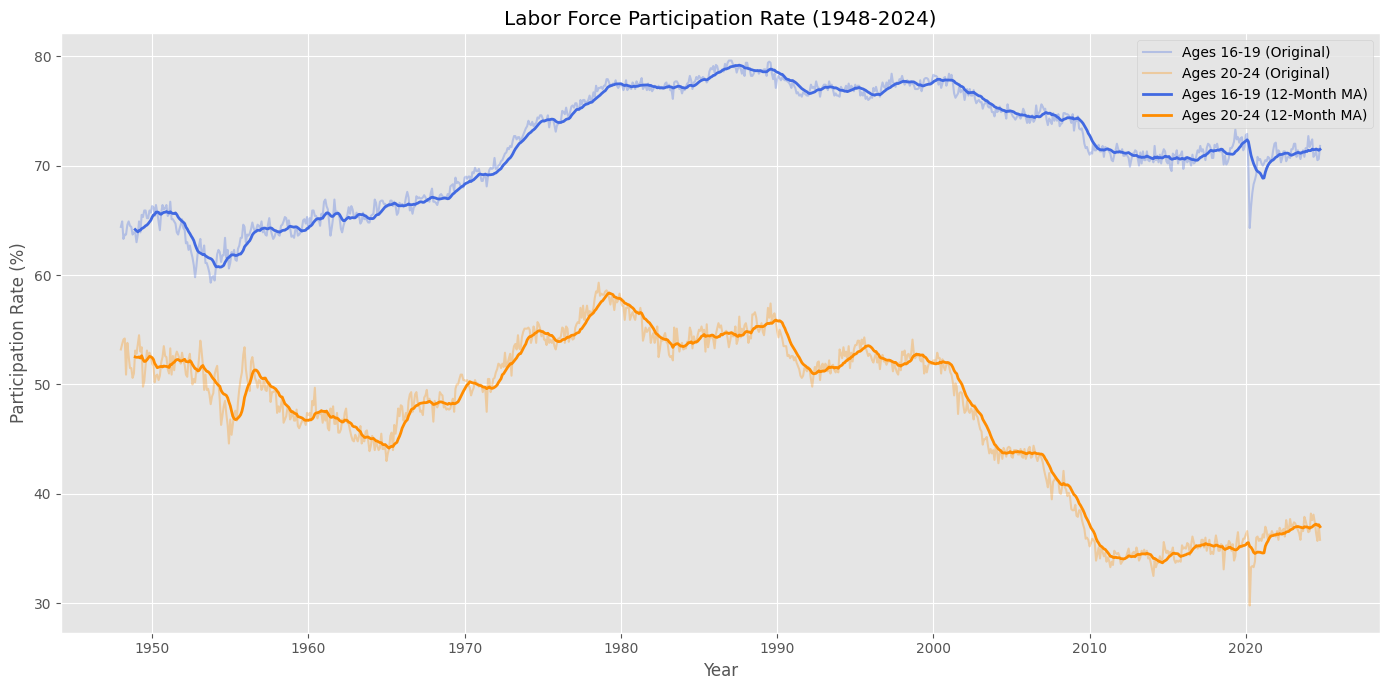

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

path_16_19 = "LaborForceParticipation/data_16_19.csv"
path_20_24 = "LaborForceParticipation/data_20_24.csv"

data_16_19 = pd.read_csv(path_16_19)
data_20_24 = pd.read_csv(path_20_24)

data_16_19.rename(columns={'LNS11300036': 'Participation_16_19'}, inplace= True)
data_20_24.rename(columns={'LNS11300012': 'Participation_20_24'}, inplace=True)

data_16_19['DATE'] = pd.to_datetime(data_16_19['DATE'])
data_20_24['DATE'] = pd.to_datetime(data_20_24['DATE'])

merge_data = pd.merge(data_16_19, data_20_24, on= 'DATE')

filtered_data = merge_data[ (merge_data['DATE'].dt.year >= 1948) & (merge_data['DATE'].dt.year <= 2024)]

years = filtered_data['DATE']
participation_16_19 = filtered_data['Participation_16_19']
participation_20_24 = filtered_data['Participation_20_24']

# Calculate 12-month moving averages
filtered_data['MA_16_19'] = filtered_data['Participation_16_19'].rolling(window=12).mean()
filtered_data['MA_20_24'] = filtered_data['Participation_20_24'].rolling(window=12).mean()

plt.style.use('ggplot')
plt.figure(figsize=(14, 7))
#plot original data
plt.plot(years, participation_16_19, color='royalblue', alpha=0.3, label='Ages 16-19 (Original)')
plt.plot(years, participation_20_24, color='darkorange', alpha=0.3, label='Ages 20-24 (Original)')
#plot moving average
plt.plot(filtered_data['DATE'], filtered_data['MA_16_19'], color='royalblue', linewidth=2, label='Ages 16-19 (12-Month MA)')
plt.plot(filtered_data['DATE'], filtered_data['MA_20_24'], color='darkorange', linewidth=2, label='Ages 20-24 (12-Month MA)')
plt.title('Labor Force Participation Rate For Age Group 16 - 24 (1948-2024)')
plt.xlabel('Year')
plt.ylabel('Participation Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()